<a href="https://colab.research.google.com/github/himanshu-nishad/Data-Analysis-with-Pandas/blob/main/assignment_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [5]:


# Load the Excel file
file_path = "/content/Data Analyst Assignement .xlsx"
xls = pd.ExcelFile(file_path)

# Load individual sheets
attempts_df = pd.read_excel(xls, sheet_name="Attempts Data")
chapter_df = pd.read_excel(xls, sheet_name="Chapter Data")

# Display first few rows
attempts_df.head(), chapter_df.head()


(   school_id  user_id  section_id  chapter_id  topic_id quiz_type    qid  \
 0       1124   132591        3677       16228     16229        PE  13865   
 1       1124   132591        3677       16228     16229        PE    560   
 2       1124   132591        3677       16228     16229        PE  13872   
 3       1096   121315        2706       21994     21999        PE  16155   
 4       1096   121315        2706       21994     21999        PE  16223   
 
   question_status learning_unit_id Bloom taxonomy       date             time  
 0         correct         LU005214          apply 2024-10-03  14:36:54.975000  
 1         correct         LU005214          apply 2024-10-03  14:36:54.975000  
 2         correct         LU005214        analyse 2024-10-03  14:36:54.975000  
 3         correct         LU005381     understand 2024-10-03  14:37:00.403000  
 4         correct         LU005377       remember 2024-10-03  14:37:00.403000  ,
    section_id  chapter          start_time      

In [9]:
# Checking for Duplicates in Attempts data
attempts_df.duplicated().sum()


51

In [10]:
# Checking for Duplicates in Chapter data
chapter_df.duplicated().sum()

0

In [11]:
# Removing the Duplicates form Attempts data
attempts_df_cleaned = attempts_df.drop_duplicates()
chapter_df_cleaned = chapter_df.drop_duplicates()


In [15]:
#Handling the Missing Values in Chapter Data
chapter_df_cleaned = chapter_df_cleaned.dropna(subset=['end_time'])



**Top 5 section where Accuracy percentage is High**

In [20]:
accuracy_df = attempts_df_cleaned.groupby('section_id')['question_status'].apply(lambda x: (x == 'correct').mean()).reset_index()
top_sections = accuracy_df.sort_values(by='question_status', ascending=False).head(5)
print("Top 5 Sections with Highest Accuracy:\n", top_sections)

Top 5 Sections with Highest Accuracy:
     section_id  question_status
0         1981              1.0
76        3660              1.0
79        3677              1.0
54        2851              1.0
28        2626              1.0


**Identify Bottom 2 Learning Units with Lowest Accuracy**

In [22]:
learning_unit_accuracy = attempts_df_cleaned.groupby('learning_unit_id')['question_status'].apply(lambda x: (x == 'correct').mean()).reset_index()
bottom_units = learning_unit_accuracy.sort_values(by='question_status').head(2)
print("Bottom 2 Learning Units with Lowest Accuracy:\n", bottom_units)

Bottom 2 Learning Units with Lowest Accuracy:
     learning_unit_id  question_status
283         LU005435              0.0
170         LU000735              0.0


**Check Percentage of Attempts Before Chapter End Time**

In [28]:
# Assuming 'merged_df' contains columns 'date' and 'time'
# If 'date' column is not present, adjust accordingly

# Create a new column 'datetime' by combining 'date' and 'time' columns
merged_df['datetime'] = pd.to_datetime(merged_df['date'].astype(str) + ' ' + merged_df['time'].astype(str))

# Now use 'datetime' column for comparison
merged_df["attempt_before_end"] = merged_df["datetime"] < merged_df["end_time"]
attempt_before_end_percentage = merged_df["attempt_before_end"].mean() * 100
print("Percentage of Attempts Before Chapter End Time:", attempt_before_end_percentage, "%")

Percentage of Attempts Before Chapter End Time: 54.76529160739687 %


**Plotting Attempt Trends Over Time**

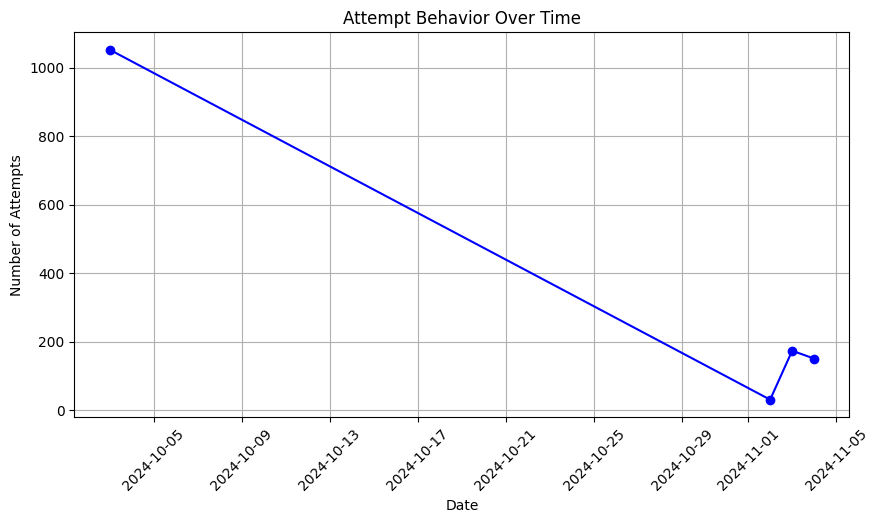

In [29]:
import matplotlib.pyplot as plt

# Count attempts per date
attempts_over_time = attempts_df_cleaned.groupby("date").size()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(attempts_over_time.index, attempts_over_time.values, marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Number of Attempts")
plt.title("Attempt Behavior Over Time")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
